## Ensemble learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

### Classification by optical recognition of handwritten digits

The [digits](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset) dataset
has 1797 labeled images of hand-written digits.
- $X$ = `digits.data` has shape (1797, 64).
  - Each image $\mathbf{x}_i$ is represented as the $i$th row of 64 pixel values in the 2D
    `digits.data` array that corresponds to an 8x8 photo of a handwritten digit.
  - We can revover the $i$th 8x8 matrix via `digits.data[i].reshape(8, 8)`.
- $y$ = `digits.target` has shape (1797,). Each $y_i$ is a number from 0 to 9 indicating
  the handwritten digit that was photographed and stored in $\mathbf{x}_i$.
  - So this is a multiclass classification problem with $C = 10$ classes.

First we explore the data.

In [3]:
digits = datasets.load_digits()

In [5]:
print(f'digits.data.shape={digits.data.shape}')
print(f'digits.target.shape={digits.target.shape}')
row_0 = digits.data[0, :]
print(f'The first image is digits.data[0] (shown here as 8x8 instead of 1x64):')
print(f'The first target is y={digits.target[0]}.')
print(f'{row_0.reshape(8, 8)}')


digits.data.shape=(1797, 64)
digits.target.shape=(1797,)
The first image is digits.data[0] (shown here as 8x8 instead of 1x64):
The first target is y=0.
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


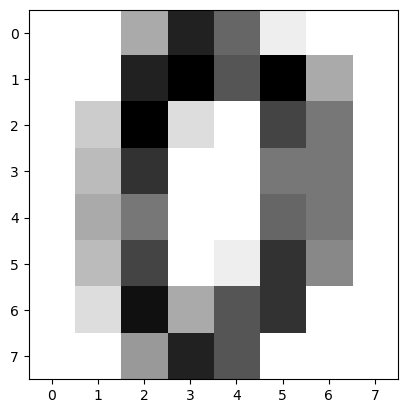

In [7]:
_ = plt.imshow(digits.data[0].reshape(8, 8), cmap='binary') # 'binary' gives greyscale

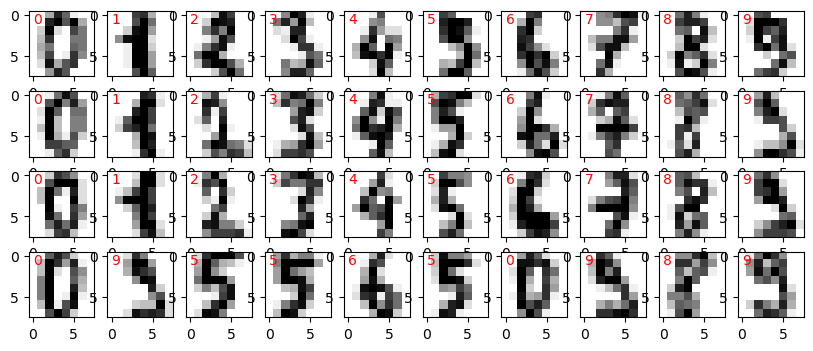

In [15]:
# now show the first image again in the context of the first 40 images:
fig = plt.figure(figsize=(10, 4)) # new blank figure
gs = fig.add_gridspec(nrows=4, ncols=10) # grid of plot axes
for i in np.arange(40): # i goes from 0 to 39; or if we consider it as a 2-digit number, from 00 to 39
    # In the next line, the row is i's first digit and the column is i's second digit.
    # e.g. Image 23 goes in row 2 and column 3 of the 10x4 plot.
    ax = fig.add_subplot(gs[i // 10, i % 10])
    ax.text(x=0, y=1, s=digits.target[i], color='red')
    ax.imshow(digits.data[i].reshape(8, 8), cmap='binary')

We can see from digits.target that the first three rows are repeats of 0 through 9,
but the fourth row seems to be random digits:

In [17]:
first_40_y_values = digits.target[0:40].copy()
first_40_y_values.reshape(4, 10)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 9, 5, 5, 6, 5, 0, 9, 8, 9]])

Here we split the digits data into training, validation, and test sets:

In [19]:
X = digits.data
y = digits.target
# split 80% training data, 20% "_tmp" for validation & test
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=.2,
                                                  random_state=0, stratify=y)
# of remaining 20%, split in half to get 10% validation, 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0, stratify=y_tmp)

## Here we try ensemble learning.
We will try each of bagging, random forest, and gradient boosting to see whether
they improve performance over a basic decision tree.

In [21]:
# Here is a basic ID3 DecisionTree from long ago in unit 3.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'DecisionTree validation_score={validation_score:.3}')

# Here is Bagging with the DecisionTree and some default values.
clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8),
                        n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'Bagging validation_score={validation_score:.3}')

# Here is a RandomForest. I tuned the max_depth=8 by hand, starting
# with 2, getting lousy results, and finding 8 was best of 2 through 9.
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'RandomForest validation_score={validation_score:.3}')

# Here is GradientBoosting with default values.
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.00,
    max_depth=1, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'GradientBoosting validation_score={validation_score:.3}')

DecisionTree validation_score=0.856
Bagging validation_score=0.956
RandomForest validation_score=0.972
GradientBoosting validation_score=0.183


With very little effort, Bagging and RandomForest improved upon the basic
DecisionTree. Hyperparameter tuning (via GridSearchCV() or RandomizedSearchCV())
might help further.

This run of GradientBoosting is a disaster! The problem, I think (from code
experiments in class) is the learning rate $\alpha = 1.0$ is too large.
I may add code later to do hyperparameter tuning to find a good value and see
that GradientBoosting can help too.

(In fact $\alpha = 0.25$ yields 0.956, but I will leave the `learning_rate=1.0`
code here to show the failure with $\alpha=1.0$.)
### From the previous four models, choose the best (on validation data) and evaluate it on test data.


In [23]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_train, y_train)
validation_score = clf.score(X_valid, y_valid)
print(f'RandomForest validation_score={validation_score:.3}')
test_score = clf.score(X_test, y_test)
print(f'RandomForest test_score={test_score:.3}')


RandomForest validation_score=0.972
RandomForest test_score=0.956
